In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [3]:
df1 = pd.read_csv('day.csv')
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:

# unique values
df1.apply(lambda x: len(x.unique()))

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [6]:
## Preprocessing the dataset
# check for null values
df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df1 = df1.rename(columns={'weathersit':'weather',
                           'yr':'year',
                           'mnth':'month',
                           'hum':'humidity',
                           'cnt':'count'})


In [8]:
df1.loc[df1['season'] == 1, 'season'] = 'Winter'
df1.loc[df1['season'] == 2, 'season'] = 'Spring'
df1.loc[df1['season'] == 3, 'season'] = 'Summer'
df1.loc[df1['season'] == 4, 'season'] = 'Fall'
df1.loc[df1['year'] == 0,'year'] = '2011'
df1.loc[df1['year'] == 1,'year'] = '2012'

In [9]:
df1

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Winter,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Winter,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Winter,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Winter,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Winter,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [10]:
cols = ['holiday','weekday','workingday','weather']

for col in cols:
    df1[col] = df1[col].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    object  
 3   year        731 non-null    object  
 4   month       731 non-null    int64   
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weather     731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  humidity    731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  count       731 non-null    int64   
dtypes: category(4), float64(4), int64(5), object(3)
memory usage: 72.2+ KB


[Text(0.5, 1.0, 'Year bike usage')]

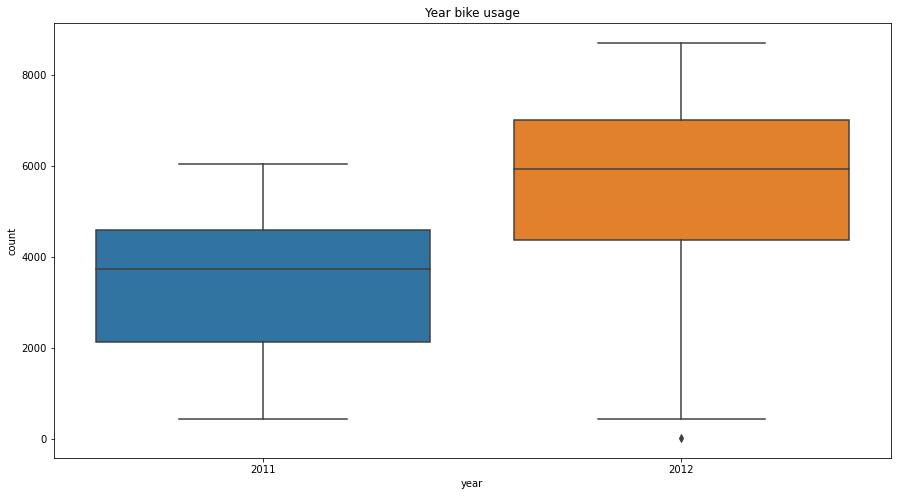

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=df1, x='year', y='count', ax=ax)
ax.set(title='Year bike usage')

[Text(0.5, 1.0, 'Count of bikes during the season')]

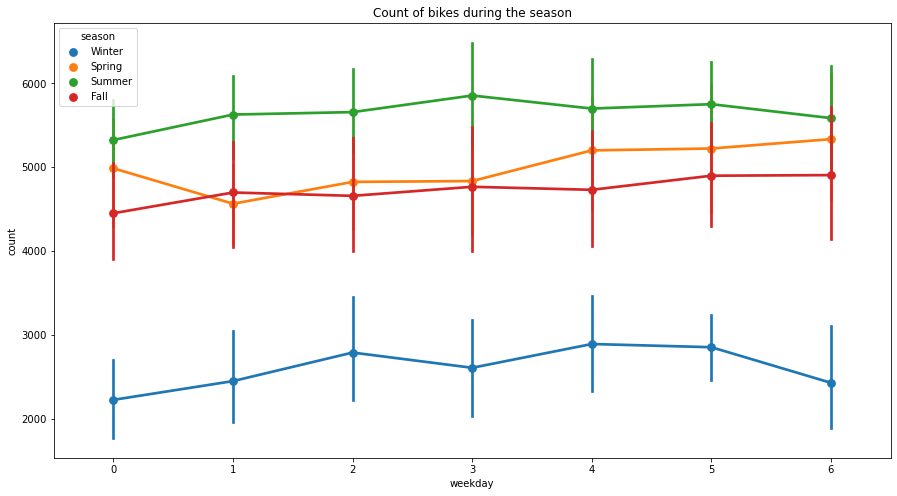

In [12]:
### Exploratory Data Analysis
fig, ax = plt.subplots(figsize=(15,8))
sns.pointplot(data=df1, x='weekday', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during the season')

[Text(0.5, 1.0, 'Monthly bike Usage')]

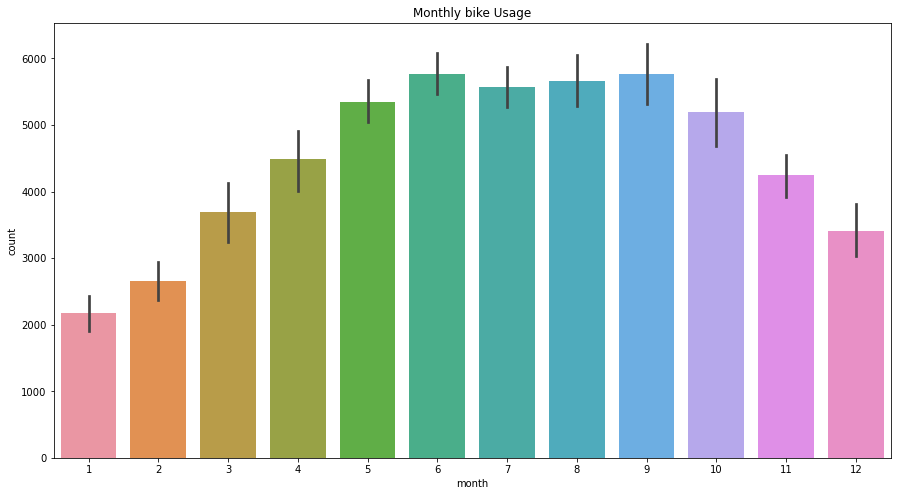

In [13]:
### Exploratory Data Analysis
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=df1, x='month', y='count', ax=ax)
ax.set(title='Monthly bike Usage')

[Text(0.5, 1.0, 'Weekday bike usage')]

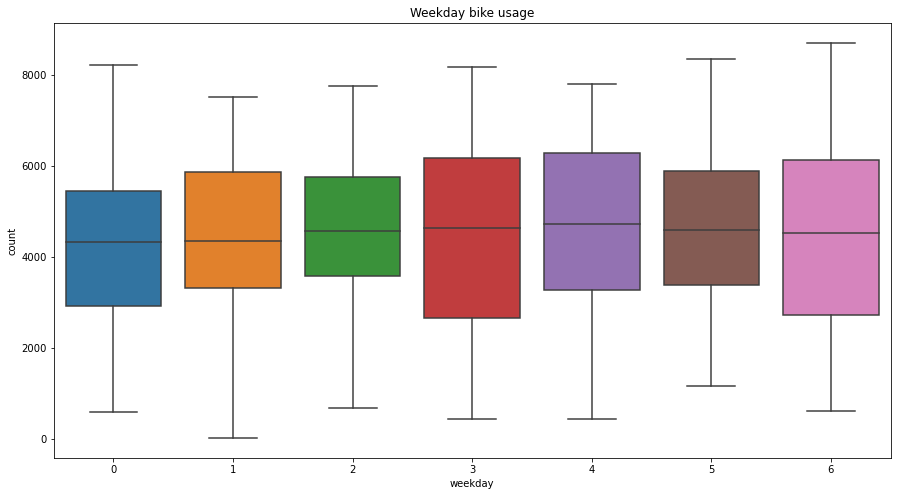

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=df1, x='weekday', y='count', ax=ax)
ax.set(title='Weekday bike usage')

In [ ]:
df2 = df1[[]]

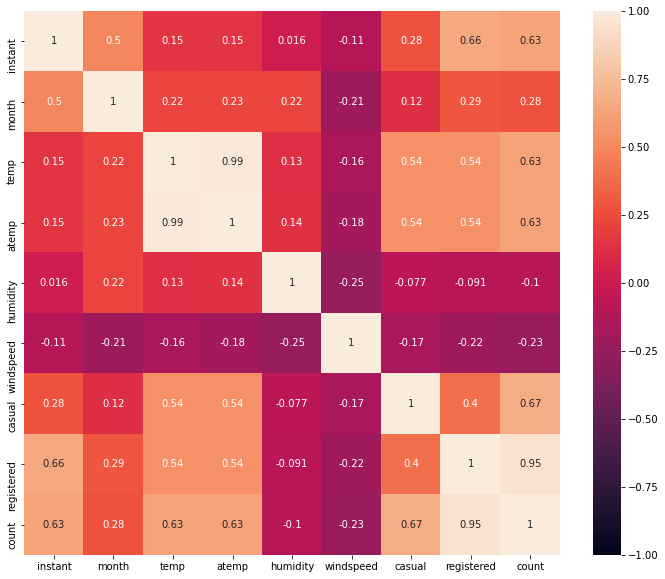

In [15]:
corr = df1.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [ ]:
#correlation - run the same code for red wine ()

# taking all rows but only columns with numeric values
Bikedata = df1[df1['wine_type'] == 'white']
wine_white.drop(['quality_label','wine_type'], inplace=True, axis=1)

correlation_mat = wine_white.corr()

#sns.heatmap(correlation_mat, annot = True)

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(correlation_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(correlation_mat, mask=mask, cmap=cmap, 
        square=True, annot=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.xticks(rotation=45)
plt.savefig("wine-fig-corr.png", format='png',dpi=300)